<class 'numpy.ndarray'> (443, 542, 3)


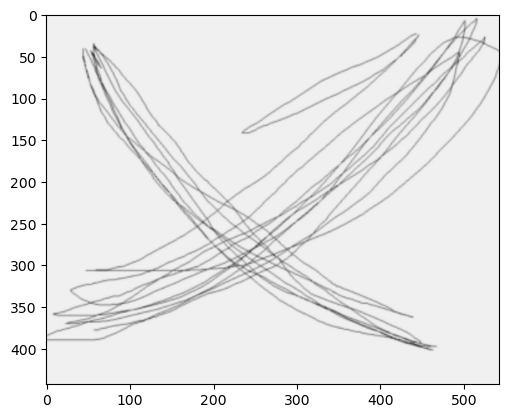

In [89]:
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
import numpy as np

data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

labels = data_labels['arr_0']

Z = labels[:14000]


img = cv2.imread('input_images/sizeTest.png')   # Read the image
print(type(img),img.shape)
plt.imshow(img)

In [90]:
def resize(image, new_x_dim):
    
    dim = (new_x_dim, new_x_dim)
    return cv2.resize(image, dim, 1)

<class 'numpy.ndarray'> (64, 64, 3)


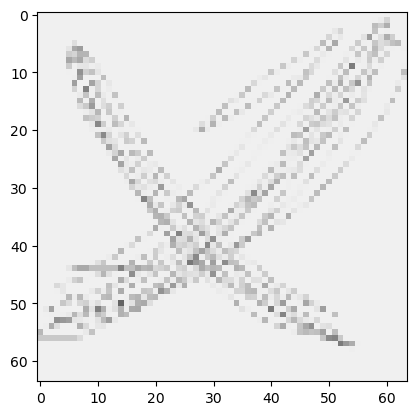

In [91]:
smallImg = resize(img, 64)
print(type(smallImg),smallImg.shape)
plt.imshow(smallImg)

In [92]:
import tensorflow as tf

model = keras.models.load_model('../Kanji-recognizer/saved_sequential_model')

new_image = cv2.cvtColor(smallImg, cv2.COLOR_RGB2GRAY)
new_image = cv2.bitwise_not(new_image)
new_image=np.array(new_image)
new_image=new_image/255


print(type(new_image),new_image.shape)
dim_img = tf.expand_dims(new_image, 0)
print(type(dim_img),dim_img.shape)
predictions = model.predict(dim_img)
print('Predictions shape:', predictions.shape)
print('Predictions:', predictions)
predicted_classes = predictions.argmax(axis=-1)
print('Predicted class:', predicted_classes)

#plt.imshow(dim_img, cmap="gray")
print(dim_img)


<class 'numpy.ndarray'> (64, 64)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 64, 64)
1/1 [==============================] - 0s 75ms/step
Predictions shape: (1, 79)
Predictions: [[0.00365302 0.00785448 0.01362778 0.0118967  0.01345035 0.00802765
  0.00971898 0.00960025 0.01289643 0.00834805 0.00874722 0.01391467
  0.01259925 0.00800367 0.00863542 0.01622638 0.02606526 0.01918675
  0.00606076 0.01189302 0.00761476 0.01633518 0.00512279 0.0095093
  0.01982012 0.01853768 0.01133124 0.01200376 0.00761436 0.01575558
  0.01085245 0.01186707 0.03546398 0.00877325 0.01311636 0.01148054
  0.00529568 0.00740213 0.01162485 0.01806312 0.01848606 0.01364151
  0.00765186 0.0091866  0.01033102 0.00557782 0.00779942 0.02523447
  0.01184635 0.00545673 0.05817172 0.02015519 0.02164596 0.02852219
  0.01804504 0.03029116 0.00633563 0.01236133 0.00845246 0.01189182
  0.00566013 0.00656242 0.00458317 0.00568987 0.0264074  0.00730263
  0.00180985 0.00442129 0.03084903 0.01060658 0.01543656 0.006

In [93]:
import webscraping

def kanji(kaniUnicode):
    return chr(int(kaniUnicode[2:], 16))


print(np.unique(Z)[predicted_classes][0])
print(kanji(np.unique(Z)[predicted_classes][0]))

webscraping.get_meaning(kanji(np.unique(Z)[predicted_classes][0]))

U+4E5F
也

to be (classical)

